In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Latex
from sympy import * 
from iminuit import Minuit
import seaborn as sns
import pandas as pd
import scipy as sp
import sys                                             # Modules to see files and folders in directories
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression,nice_string_output, add_text_to_ax
from scipy.stats import binom, poisson, norm
from Rolling_ball_functions import data_sorting,data_import,mean_func
from Universal_functions import weighted_mean,uncertainty_weighted,fit_multiple

In [6]:
def fit_function_Lin(x, slope, intersection):
    return intersection+ 1/2*slope*x**2 

In [7]:
def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    from IPython.core.display import Latex
    from sympy import * 
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    return display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [8]:
Data=pd.read_csv("../data/data_setup.csv")

In [9]:
Tea=np.arcsin(weighted_mean(Data.height.dropna(),Data.height_std.dropna())/np.sqrt(weighted_mean(Data.height.dropna(),Data.height_std.dropna())**2+weighted_mean(Data.length.dropna(),Data.length_std.dropna())**2))*180/np.pi

In [10]:
Laser_1=weighted_mean(np.array(Data.laser_1.dropna()),np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2=weighted_mean(np.array(Data.laser_2.dropna()),np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3=weighted_mean(np.array(Data.laser_3.dropna()),np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4=weighted_mean(np.array(Data.laser_4.dropna()),np.array(Data.laser_4_std.dropna())) *10**(-2)
Laser_1_std=uncertainty_weighted(np.array(Data.laser_1_std.dropna()))*10**(-2)
Laser_2_std=uncertainty_weighted(np.array(Data.laser_2_std.dropna()))*10**(-2)
Laser_3_std=uncertainty_weighted(np.array(Data.laser_3_std.dropna()))*10**(-2)
Laser_4_std=uncertainty_weighted(np.array(Data.laser_4_std.dropna()))*10**(-2)
Length_slope=np.array([0.0001,Laser_1,Laser_2,Laser_3,Laser_4])
Length_slope_std=np.array([0.1,Laser_1_std,Laser_2_std,Laser_3_std,Laser_4_std])


In [11]:
Number_of_datasets=5
skiprows_pd=15
location="../data/slope/"


In [12]:
Length_slope-np.roll(Length_slope,1)
Length_slope=np.array([0,0.14925,0.14925+0.1615,0.1765+0.1615+0.14925,0.17865+0.1765+0.1615+0.14925])

In [13]:


Time_big,Voltages_big=data_import(5,"exported_data_big_ball_acc_",15,location)
Time_small,Voltages_small=data_import(5,"exported_data_acc_small_ball_",15,location)
Time_big_180,Voltages_big_180=data_import(5,"exported_data_acc_small_180_deg_",15,location)
Time_small_180,Voltages_small_180=data_import(5,"exported_data_acc_big_ball_180_deg_",15,location)


In [14]:
Delta_T_big,Delta_T_big_std=mean_func(Time_big,Voltages_big)
Delta_T_small,Delta_T_small_std=mean_func(Time_small,Voltages_small)
Delta_T_big_180,Delta_T_big_180_std=mean_func(Time_big_180,Voltages_big_180)
Delta_T_small_180,Delta_T_small_180_std=mean_func(Time_small_180,Voltages_small_180)

In [15]:
chi2_object_big = Chi2Regression(fit_function_Lin, Delta_T_big,Length_slope, Length_slope_std) 
minuitLin_big= Minuit(chi2_object_big, pedantic=False, intersection=1, slope=1, print_level=0) 
minuitLin_big.migrad();

In [16]:
chi2_object_small = Chi2Regression(fit_function_Lin,Delta_T_small,Length_slope, Length_slope_std) 
minuitLin_small= Minuit(chi2_object_small, pedantic=False, intersection=1, slope=1, print_level=0) 
minuitLin_small.migrad();

In [17]:
chi2_object_big_180 = Chi2Regression(fit_function_Lin, Delta_T_big_180,Length_slope, Length_slope_std) 
minuitLin_big_180= Minuit(chi2_object_big_180, pedantic=False, intersection=1, slope=1, print_level=0) 
minuitLin_big_180.migrad();

In [18]:
chi2_object_small_180 = Chi2Regression(fit_function_Lin,Delta_T_small_180,Length_slope, Length_slope_std) 
minuitLin_small_180= Minuit(chi2_object_small_180, pedantic=False, intersection=1, slope=1, print_level=0) 
minuitLin_small_180.migrad();

In [19]:
x=np.linspace(0,0.64,100)

0.0


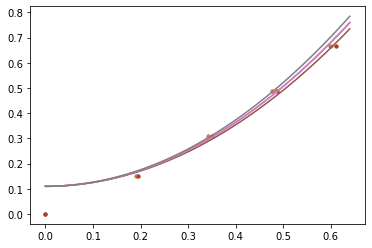

In [20]:
print(Delta_T_big[0])
plt.plot(Delta_T_big,Length_slope,'.')
plt.plot(Delta_T_big_180,Length_slope,'.')
plt.plot(Delta_T_small,Length_slope,'.')
plt.plot(Delta_T_small,Length_slope,'.')
plt.plot(x,fit_function_Lin(x,minuitLin_big.args[0],minuitLin_big.args[1]))
plt.plot(x,fit_function_Lin(x,minuitLin_small.args[0],minuitLin_small.args[1]))
plt.plot(x,fit_function_Lin(x,minuitLin_big_180.args[0],minuitLin_big_180.args[1]))
plt.plot(x,fit_function_Lin(x,minuitLin_small_180.args[0],minuitLin_small_180.args[1]))

In [21]:
g,a,DB,DR,T1,T2= symbols("g,a,D_{ball},D_{rail},theta,theta_Delta")
dDB,dDr,dT,dTd,da,dg= symbols("sigma_DB, sigma_Dr, sigma_theta, sigma_Delta ,sigma_a,sigma_g")

In [22]:
g=a/( T1 + T2 )*((1)+(2/5)*DB**2/(DB**2-DR**2))
dg=sqrt((da*g.diff(a))**2+(g.diff(DB)*dDB)**2+(g.diff(dDr)*dDr)**2+(g.diff(T1)*dT)**2+(g.diff(T2)*dTd)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## weigthed_ball_sections

In [23]:
big_ball=weighted_mean(np.array(Data.big_ball.dropna()),np.array(Data.big_ball_std.dropna()))*10**(-3)
small_ball=weighted_mean(np.array(Data.small_ball.dropna()),np.array(Data.small_all_std.dropna()))*10**(-3)
big_ball_std=uncertainty_weighted(np.array(Data.big_ball_std.dropna()))*10**(-3)
small_ball_std=uncertainty_weighted(np.array(Data.small_all_std.dropna()))*10**(-3)

## weighted_Angle

In [24]:
angle=weighted_mean(np.array(Data.angle .dropna()),np.array(Data.angle_std.dropna()))
angle_180 =weighted_mean(np.array(Data.angle_180.dropna()),np.array(Data.angle_180_std.dropna()))
angle_std=uncertainty_weighted(np.array(Data.angle_std.dropna()))
angle_180_std=uncertainty_weighted(np.array(Data.angle_180_std.dropna()))

## d_rail

In [25]:
d_rail=weighted_mean(np.array(Data.d_rail.dropna()),np.array(Data.d_rail_std.dropna()))*10**(-3)
d_rail_std=uncertainty_weighted(Data.d_rail_std)*10**(-3)

In [26]:
deltaT=angle_180-angle


## distance Ramp weighted  Lasers

In [27]:
print(minuitLin_big.args[0]/np.sin((Tea)*np.pi/180)*(1+2/5*big_ball**2/(big_ball**2-d_rail**2))/2)
print(minuitLin_big_180.args[0]/np.sin((Tea)*np.pi/180)*(1+2/5*big_ball**2/(big_ball**2-d_rail**2))/2)
print(minuitLin_small.args[0]/np.sin((Tea)*np.pi/180)*(1+2/5*small_ball**2/(small_ball**2-d_rail**2))/2)
print(minuitLin_small_180.args[0]/np.sin((Tea)*np.pi/180)*(1+2/5*small_ball**2/(small_ball**2-d_rail**2))/2)

9.80208763036037
9.777883089953493
9.69864602333032
10.474764860863738


In [28]:
print((angle-angle_180)/2)
print(angle)
Tea

-0.22999999999999954
13.0


13.76394697616326

In [29]:
g,a,DB,DR,T1,T2= symbols("g,a,D_{ball},D_{rail},theta,theta_Delta")
dDB,dDr,dT,da,dg= symbols("sigma_DB, sigma_Dr, sigma_theta,sigma_a,sigma_g")

In [30]:
g=a/( T1 + T2 )*((1)+(2/5)*DB**2/(DB**2-DR**2))
dg=sqrt((da*g.diff(a))**2+(g.diff(DB)*dDB)**2+(g.diff(dDr)*dDr)**2+(g.diff(T1)*dT)**2)
lprint(latex(Eq(symbols('g'), g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [31]:
print(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,big_uncertainty_slope,big_ball_std,d_rail_std,angle_std*np.pi/180)

NameError: name 'big_weighted_slope' is not defined

In [32]:
# Turn expression into numerical functions 
fg = lambdify((a,DB,DR,T1,T2),g)
fdg = lambdify((a,DB,DR,T1,T2,da,dDB,dDr,dT),dg)
# Numerically evaluate expressions and print 
vg_big= fg(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180)
vdg_big = fdg(big_weighted_slope,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180,big_uncertainty_slope,big_ball_std,d_rail_std,angle_std*np.pi/180)
lprint(fr'q_0 = ({vg_big/2:} \pm {vdg_big:})\,\mathrm{{m/s^2}}')


NameError: name 'big_weighted_slope' is not defined

In [33]:
vg_small= fg(small_weighted_slope,small_ball,d_rail,13.0*np.pi/180,(angle_180-angle)*np.pi/180)
vdg_small = fdg(small_weighted_slope,small_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180,small_uncertainty_slope,small_ball_std,d_rail_std,angle_std*np.pi/180)
lprint(fr'q_0 = ({vg_small/2:} \pm {vdg_small/2:})\,\mathrm{{m/s^2}}')

NameError: name 'small_weighted_slope' is not defined

In [34]:
vg_big_180= fg(big_weighted_slope_180,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180)
vdg_big_180 = fdg(big_weighted_slope_180,big_ball,d_rail,angle*np.pi/180,(angle_180-angle)*np.pi/180,big_uncertainty_slope_180,big_ball_std,d_rail_std,angle_std*np.pi/180)
lprint(fr'q_0 = ({vg_big_180/2:} \pm {vdg_big_180/2:})\,\mathrm{{m/s^2}}')

NameError: name 'big_weighted_slope_180' is not defined

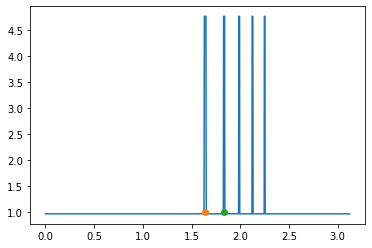

In [35]:
plt.plot(Time_small[0],Voltages_small[0])
Roll=data_sorting(Time_small[0],Voltages_small[0])
plt.plot((np.mean(Roll[0][Roll[2][0]:Roll[2][1]])+np.mean(Roll[1][Roll[3][0]:Roll[3][1]]))/2,1,'o')
plt.plot((np.mean(Roll[0][Roll[2][1]:Roll[2][2]])+np.mean(Roll[1][Roll[3][1]:Roll[3][2]]))/2,1,'o')

In [36]:
print(Roll)

(array([1.6282, 1.6284, 1.6286, 1.6288, 1.629 , 1.6292, 1.6294, 1.6296,
       1.6298, 1.63  , 1.6302, 1.6304, 1.6306, 1.6308, 1.8266, 1.8268,
       1.827 , 1.8272, 1.8274, 1.8276, 1.8278, 1.828 , 1.8282, 1.8284,
       1.9834, 1.9836, 1.9838, 1.984 , 1.9842, 1.9844, 2.1208, 2.121 ,
       2.1212, 2.1214, 2.1216, 2.246 , 2.2462, 2.2464, 2.2466, 2.2468,
       2.247 ]), array([1.6478, 1.648 , 1.6482, 1.6484, 1.6486, 1.6488, 1.649 , 1.6492,
       1.6494, 1.6496, 1.6498, 1.65  , 1.6502, 1.8396, 1.8398, 1.84  ,
       1.8402, 1.8404, 1.8406, 1.8408, 1.841 , 1.8412, 1.8414, 1.8416,
       1.9932, 1.9934, 1.9936, 1.9938, 1.994 , 2.1292, 2.1294, 2.1296,
       2.1298, 2.2534, 2.2536, 2.2538, 2.254 , 2.2542, 2.2544]), array([ 0, 14, 24, 30, 35, 40]), array([ 0, 13, 24, 29, 33, 38]))


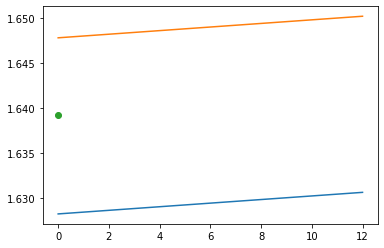

In [37]:
plt.plot(Roll[0][0:13])
plt.plot(Roll[1][0:13])
plt.plot((np.mean(Roll[0][0:14])+np.mean(Roll[1][0:13]))/2,'o')

In [38]:
chi2_object = Chi2Regression(fit_function_Lin, Time,Length_slope, Length_slope_std) 
minuitLin= Minuit(chi2_object, pedantic=False, intersection=1, slope=1, print_level=0) 
minuitLin.migrad();

NameError: name 'Time' is not defined

In [39]:
x=np.linspace(0,0.6,100)

In [40]:
plt.plot(Time,Length_slope,'.')
plt.plot(x,fit_function_Lin(x,minuitLin.args[0],minuitLin.args[1]))

NameError: name 'Time' is not defined

In [41]:
print(minuitLin.args[0]/np.sin((Tea)*np.pi/180)*(1+2/5*big_ball**2/(big_ball**2-d_rail**2))/2)

NameError: name 'minuitLin' is not defined

In [42]:
Time=np.array([weighted_mean(Time1,Time1_std),weighted_mean(Time2,Time2_std),weighted_mean(Time3,Time3_std),weighted_mean(Time4,Time4_std),weighted_mean(Time5,Time5_std)])

NameError: name 'Time1' is not defined